<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/support_vector_machione's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

In [ ]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'feature 1')

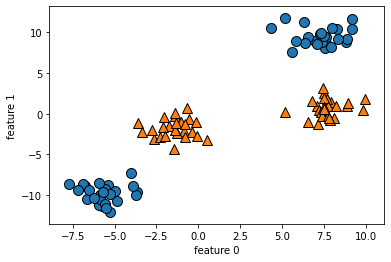

In [ ]:
X, y = make_blobs(centers=4, random_state=8)

y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

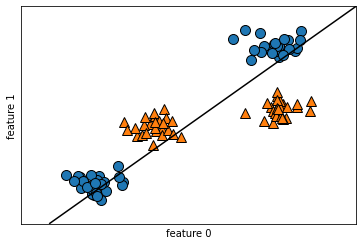

In [ ]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')


Text(0.5, 0, 'feature 1**2')

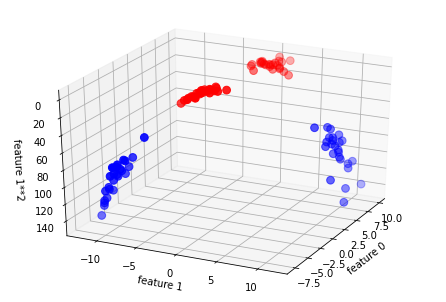

In [ ]:
# Con esto tomamos la columna 1(ultima columna) pero como una matriz con 1 columna
X[:,1:]

# add the square first feature
X_new = np.hstack([X, X[:,1:]**2])
X_new.shape

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

# Visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

# plot firts all points with y==0, then all with y==1
mask = y == 0

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
           cmap=mglearn.cm2, s=60)

ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',
           cmap=mglearn.cm2, s=60)
# aca jugamos con boolean, True entra a X_new, con ~mask cambiamos true a false; como hay dos clases este analisis es valido

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1**2')


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


IndexError: ignored

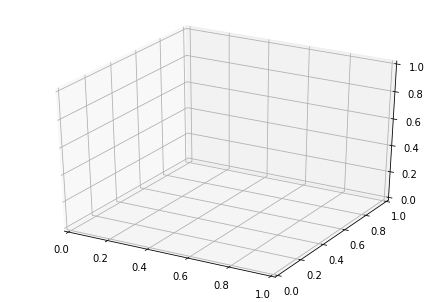

In [ ]:
linear_svm_3d = LinearSVC().fit(X, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# shoy linerar boundary decision
figure = plt.figure()

ax = Axes3D(figure)
xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max() +2, 50)


XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0 ] * XX+ coef[1] * YY + intercept) / -coef[2]




In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# plot support vectors
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0 #ravel convierte de matriz a array
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.

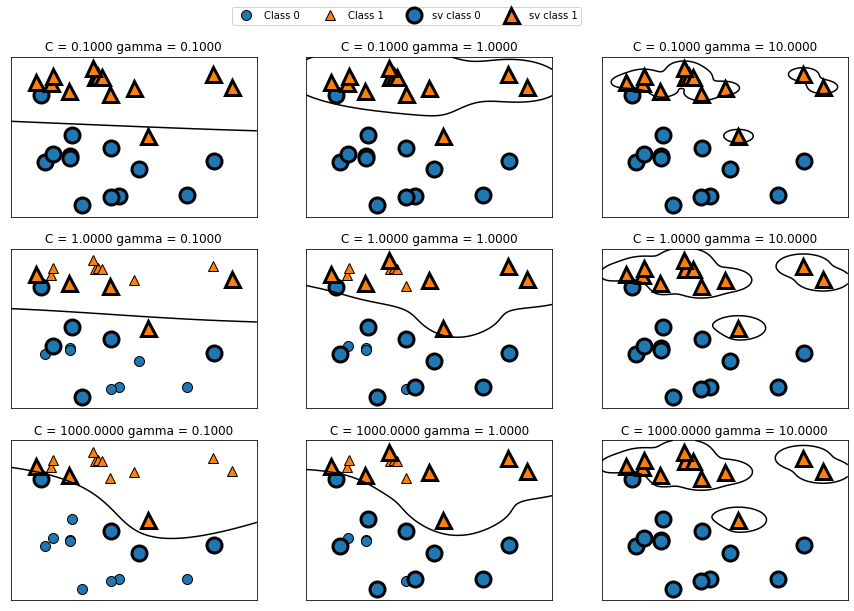

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
  
  for a, gamma in zip(ax, range(-1,2)):

    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(['Class 0', 'Class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(.9, 1.2))

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC(C=1, kernel='rbf', gamma=.1).fit(X_train, y_train)

print('accuracy train: {:.2f}'.format(svc.score(X_train, y_train)))
print('accuracy Test: {:.2f}'.format(svc.score(X_test, y_test)))


accuracy train: 1.00
accuracy Test: 0.63


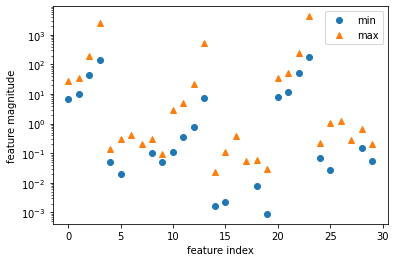

In [ ]:
# plotted in log-scale
# axis=0 columns; axis=1 rows
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc='best')
plt.xlabel('feature index')
plt.ylabel('feature magnitude')
plt.yscale('log')

In [ ]:
# Preprocessing data for SVMs
train_normalize = (X_train - X_train.min(axis=0))/(X_train.max(axis=0) - X_train.min(axis=0))

print('minimun for each feature:\n{}'.format(data_normalize.min(axis=0)))
print('maximun for each feature:\n{}'.format(data_normalize.max(axis=0)))
# bajo score de test accuracy
# for test normalize

test_normalize = (X_test - X_test.min(axis=0))/(X_test.max(axis=0) - X_test.min(axis=0))

minimun for each feature:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximun for each feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training)/range_on_training
range_on_training == (X_train.max(axis=0) - X_train.min(axis=0))
# ambos son iguales, usaremos la formulita

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
svc = SVC().fit(data_normalize, y_train)

print('accuracy data normalize train: {:.2f}'.format(svc.score(train_normalize, y_train)))
print('accuracy data normalize test: {:.2f}'.format(svc.score(test_normalize, y_test)))

accuracy data normalize train: 0.98
accuracy data normalize test: 0.91


In [ ]:
svc = SVC(C=.1, gamma=.3).fit(train_normalize, y_train)

print('C=1000; accuracy normalize train: {:.2f}'.format(svc.score(train_normalize, y_train)))
print('C=1000; accuracy normalize test: {:.2f}'.format(svc.score(test_normalize, y_test)))\
# not overffiting

C=1000; accuracy normalize train: 0.94
C=1000; accuracy normalize test: 0.94


In [ ]:
''' SVC, trabaja bien con pocas y muchas features, con 10 000 samples trabaja bien entiempo como en
rendimiento; pero si ingresamos 100 000 o mas samples el algoritmo podria tardar mas de lo devido y usando mas memoria.
SVC requiere cuidado en el preprocesamiento de datos y afinacion de parametros, para un mejor rendimiento
NO OLVIDAR AJUSTAR C AND GAMMA
'''